<a href="https://colab.research.google.com/github/Harsha-Gobinath/Oasis-Internship/blob/main/Car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving car data.csv to car data.csv


In [ ]:
car_data=pd.read_csv("car data.csv")
car_data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
inputs=car_data.drop(['Car_Name','Owner','Selling_type','Present_Price'],axis='columns')
inputs

,Year,Selling_Price,Driven_kms,Fuel_Type,Transmission
0,2014,3.35,27000,Petrol,Manual
1,2013,4.75,43000,Diesel,Manual
2,2017,7.25,6900,Petrol,Manual
3,2011,2.85,5200,Petrol,Manual
4,2014,4.60,42450,Diesel,Manual
...,...,...,...,...,...
296,2016,9.50,33988,Diesel,Manual
297,2015,4.00,60000,Petrol,Manual
298,2009,3.35,87934,Petrol,Manual
299,2017,11.50,9000,Diesel,Manual


In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [ ]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
print(car_data['Fuel_Type'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [ ]:
print(car_data['Selling_type'].value_counts())

Dealer        195
Individual    106
Name: Selling_type, dtype: int64


In [ ]:
print(car_data['Transmission'].value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [ ]:
fuel_type=car_data['Fuel_Type']
seller_type=car_data['Selling_type']
transmission_type=car_data['Transmission']
selling_price=car_data['Selling_Price']

In [ ]:
petrol_data=car_data.groupby('Fuel_Type').get_group('Petrol')
petrol_data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,239.000000,239.000000,239.000000,239.000000,239.000000
mean,2013.539749,3.264184,5.583556,33528.937238,0.050209
std,3.042674,3.135537,5.287532,40308.984886,0.270368
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.600000,0.940000,13850.000000,0.000000
50%,2014.000000,2.650000,4.600000,25870.000000,0.000000
75%,2016.000000,5.200000,7.980000,44271.000000,0.000000
max,2017.000000,19.750000,23.730000,500000.000000,3.000000


In [ ]:
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_data=pd.get_dummies(car_data,columns=['Selling_type','Transmission'],drop_first=True)

In [ ]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Owner,Selling_type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1
1,sx4,2013,4.75,9.54,43000,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,1
4,swift,2014,4.60,6.87,42450,1,0,0,1


In [ ]:
car_data.Car_Name.unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [ ]:
correlation_matrix = car_data.select_dtypes(include =np.number).corr()
target_correlation = correlation_matrix['Selling_Price'].sort_values(ascending=False)

print(target_correlation)

Selling_Price              1.000000
Present_Price              0.878914
Fuel_Type                  0.509467
Year                       0.236141
Driven_kms                 0.029187
Owner                     -0.088344
Transmission_Manual       -0.367128
Selling_type_Individual   -0.550724
Name: Selling_Price, dtype: float64


In [ ]:
X=car_data.drop(['Selling_Price','Car_Name'],axis=1)
y=car_data['Selling_Price']

In [ ]:
X

,Year,Present_Price,Driven_kms,Fuel_Type,Owner,Selling_type_Individual,Transmission_Manual
0,2014,5.59,27000,0,0,0,1
1,2013,9.54,43000,1,0,0,1
2,2017,9.85,6900,0,0,0,1
3,2011,4.15,5200,0,0,0,1
4,2014,6.87,42450,1,0,0,1
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,1
297,2015,5.90,60000,0,0,0,1
298,2009,11.00,87934,0,0,0,1
299,2017,12.50,9000,1,0,0,1


In [ ]:
print("Shape of x is: ",X.shape)
print("Shape of y is: ",y.shape)

Shape of x is:  (301, 7)
Shape of y is:  (301,)


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
print("X_test shape:", X_test.shape)
print("X_train shape:", X_train.shape)
print("y_test shape:", y_test.shape)
print("y_train shape:", X_train.shape)

X_test shape: (91, 7)
X_train shape: (210, 7)
y_test shape: (91,)
y_train shape: (210, 7)


In [ ]:
import sklearn.preprocessing as StandardScaler


In [ ]:
car_data=pd.read_csv("car data.csv")

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
print("MAE: ",(mean_absolute_error(pred, y_test)))
print("MSE: ",(mean_squared_error(pred, y_test)))
print("R2_Score",(mean_absolute_error(pred, y_test)))



MAE:  1.2581987927234455
MSE:  3.4953688860134586
R2_Score 1.2581987927234455


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

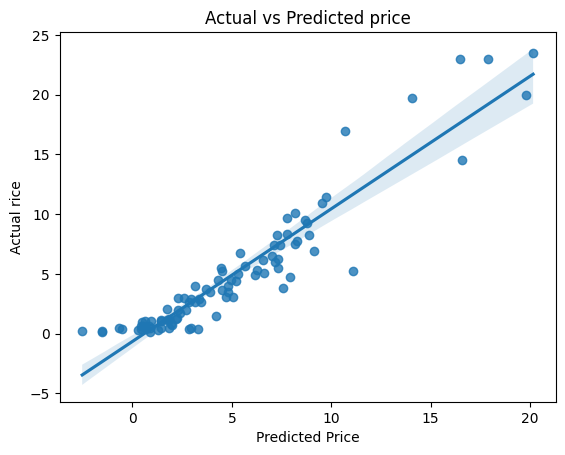

In [ ]:
sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel("Actual rice")
plt.title("Actual vs Predicted price")
plt.show()